In [2]:
#案例  用PCA重构数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA。
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')#下载并导入MNIST数据集
X, y = mnist['data'], mnist['target']
X.shape,y.shape

((70000, 784), (70000,))

9


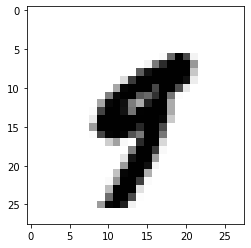

In [3]:
import matplotlib
digit_5=X[36000]
digit_5_image=digit_5.reshape(28,28)
print(y[36000])
plt.imshow(digit_5_image,cmap=matplotlib.cm.binary,interpolation="nearest")

1、如何选取合适的主成分进行特征约简

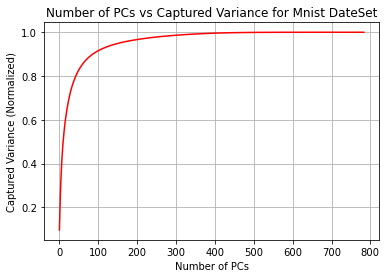

In [4]:
#1 特征约减，选择合适数量的主成分
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'r',ms=10)
plt.grid(True)
plt.title('Number of PCs vs Captured Variance for Mnist DateSet');plt.xlabel('Number of PCs');plt.ylabel('Captured Variance (Normalized)')
plt.show()

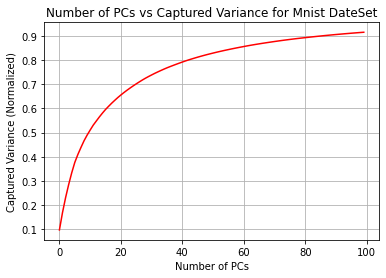

In [15]:
# 选择1-100的主成分
pca = PCA(100).fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'r',ms=10)
plt.grid(True)
plt.title('Number of PCs vs Captured Variance for Mnist DateSet');plt.xlabel('Number of PCs');plt.ylabel('Captured Variance (Normalized)')
plt.show()

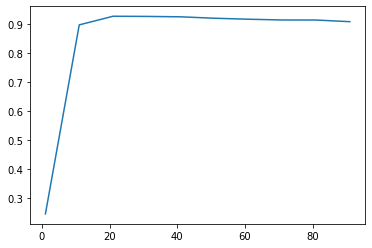

In [5]:
# 确定大致范围
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
scores = []
for i in range(1,101,10):
    x_tr = PCA(i).fit_transform(X)
    score = cross_val_score(RFC(n_estimators=10,random_state=20),x_tr,y,cv=5).mean()
    scores.append(score)
plt.plot(range(1,101,10),scores)
plt.show()  

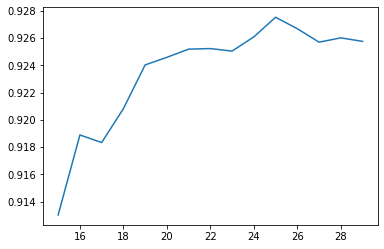

In [6]:
# 进一步确定范围
scores = []
for i in range(15,30):
    x_tr = PCA(i).fit_transform(X)
    score = cross_val_score(RFC(n_estimators=10,random_state=20),x_tr,y,cv=5).mean()
    scores.append(score)
plt.plot(range(15,30),scores)
plt.show()

2、重构数据-以重构手写数字集中的数字6为例

In [31]:
from PIL import Image

In [32]:
# 2、重构数字6
origin_6_imgs=[]
for i in range(2000):
    if int(y[i])== 6 and len(origin_6_imgs) < 100:
        origin_6_imgs.append(X[i])
print(np.array(origin_6_imgs).shape)

(100, 784)


In [34]:
# 降维前的数字 6
#从array 转成image
def array_to_img(array):
    new_img=Image.fromarray(array.astype(np.uint8))
    return new_img

def comb_imgs(origin_imgs, col, row, each_width, each_height, new_type):
    new_img = Image.new(new_type, (col* each_width, row* each_height)) 
    for i in range(len(origin_imgs)):
        each_img = array_to_img(np.array(origin_imgs[i]).reshape(each_width, each_width))
        # 第二个参数为每次粘贴起始点的横纵坐标。在本例中，分别为（0，0）（28，0）（28*2，0）依次类推，第二行是（0，28）（28，28），（28*2，28）类推
        new_img.paste(each_img, (int((i % col)) * each_width, int((i / col))* each_width))
    return new_img

origin_6_imgs_100=comb_imgs(origin_6_imgs, 10, 10, 28, 28, 'L')
origin_6_imgs_100.show()

In [35]:
#降维后取用1个主成分，进行恢复
pca=PCA(n_components=1)
pca_6_imgs=pca.fit_transform(origin_6_imgs)
inverse_6_imgs=pca.inverse_transform(pca_6_imgs)
print(np.array(pca_6_imgs).shape)
print(np.array(inverse_6_imgs).shape)
inverse_6_imgs_100 = comb_imgs(inverse_6_imgs, 10, 10, 28, 28, 'L')
inverse_6_imgs_100.show()

(100, 1)
(100, 784)


In [36]:
#降维后取用100个主成分，进行恢复
pca=PCA(n_components=100)
pca_6_imgs=pca.fit_transform(origin_6_imgs)
inverse_6_imgs=pca.inverse_transform(pca_6_imgs)
print(np.array(pca_6_imgs).shape)
print(np.array(inverse_6_imgs).shape)
inverse_6_imgs_100 = comb_imgs(inverse_6_imgs, 10, 10, 28, 28, 'L')
inverse_6_imgs_100.show()

(100, 100)
(100, 784)


3、PCA可以进行降噪，以手写数字集6为例

In [39]:
print(len(origin_6_imgs))

100


In [65]:
#定义画图方法
def draw_img(data):
    figs, objs = plt.subplots(1,10,figsize=(10,3),subplot_kw={"xticks":[],"yticks":[]})
    for i,obj in enumerate(objs.flat):
        obj.imshow(data[i].reshape(28,28),cmap=matplotlib.cm.binary)
    

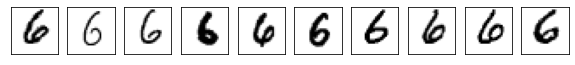

In [66]:
draw_img(origin_6_imgs[:10])

(10, 784)


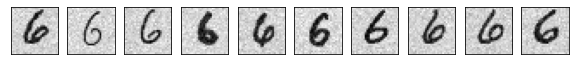

In [67]:
# 加入一些噪声
noisy=np.random.normal(origin_6_imgs[:10],20)
print(noisy.shape)
draw_img(noisy)

In [68]:
print(noisy.T.shape)

(784, 10)


(10, 3)


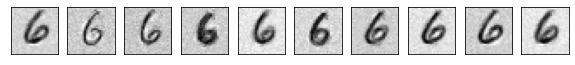

In [69]:
pca = PCA(0.50)
x_dr = pca.fit_transform(noisy)
print(x_dr.shape)
x_inverse = pca.inverse_transform(x_dr)
draw_img(x_inverse)